<a href="https://colab.research.google.com/github/DIFACQUIM/De-Novo_DNMT1/blob/main/QED_and_SAscore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.rdkit.org/docs/source/rdkit.Chem.QED.html \
[Quantifying the chemical beauty of drugs]([https://doi.org/10.1038/nchem.1243) \
[Estimation of synthetic accessibility score of drug-like molecules based on molecular complexity and fragment contributions](https://jcheminf.biomedcentral.com/articles/10.1186/1758-2946-1-8)

In [2]:
#Install RDKit
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 24.7 MB/s eta 0:00:00


In [3]:
#Import libraries
from rdkit import Chem
from rdkit.Chem import QED
from rdkit.Chem import PandasTools
import pandas as pd
import os
from rdkit import RDConfig
from rdkit.Chem import RDConfig
import sys
sys.path.append(os.path.join(RDConfig.RDContribDir, 'SA_Score'))
import sascorer

In [4]:
#De novo compounds
df=pd.read_csv("https://github.com/DIFACQUIM/De-Novo_DNMT1/raw/main/LigBuilder/LigBuilder_2491.csv", delimiter=",")
print(df.shape)
df.head(2)

(2491, 9)


,SMILES,DATABASE,ID,PROGRAM,FRAGMENTS,DATASET,PROGRAM_SCORE,SMILES_chiral,SMILES_no_chiral
0,c1(c(cc2c(c1)CNN2)CC(=O)OC[C@H](CO)NC(=O)C(=C)...,LB_DEFLT,LBDEF10_037,LigBuilder,Default,LB_DEFLT10,8.01,C=C(CN)C(=O)N[C@@H](CO)COC(=O)Cc1cc2c(cc1C(=O)...,C=C(CN)C(=O)NC(CO)COC(=O)Cc1cc2c(cc1C(=O)c1cc(...
1,Oc1cccc(c1)NC(=O)NC/C=C/C(=O)[C@H](N)C1=NN=C(O...,LB_DEFLT,LBDEF03_327,LigBuilder,Default,LB_DEFLT03,7.98,N=C(C(=O)CCCNC(=O)Nc1cccc(O)c1)c1nnc(CCNC(=O)c...,N=C(C(=O)CCCNC(=O)Nc1cccc(O)c1)c1nnc(CCNC(=O)c...


In [5]:
#DNMT1 actives
DNMT=pd.read_csv("https://github.com/DIFACQUIM/De-Novo_DNMT1/raw/main/DNMT1_10micM_285_curated.csv", delimiter=",")
DNMT.head(2)

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,NEW_SMILES
0,CHEMBL3087498,NaN,0,618.58,1,3.61,SGC0946,CC(C)N(CCCNC(=O)Nc1ccc(C(C)(C)C)cc1)C[C@H]1O[C...,IC50,'=',...,Homo sapiens,SINGLE PROTEIN,CHEMBL4477246,1,Scientific Literature,Bioorg Med Chem Lett,2016.0,NaN,NaN,CC(C)N(CCCNC(=O)Nc1ccc(C(C)(C)C)cc1)CC1OC(n2cc...
1,CHEMBL2171169,NaN,0,540.67,1,2.25,FED1,CC(C)N(CCCNC(=O)Nc1ccc(C(C)(C)C)cc1)C[C@H]1O[C...,IC50,'=',...,Homo sapiens,SINGLE PROTEIN,CHEMBL4477246,1,Scientific Literature,Bioorg Med Chem Lett,2016.0,NaN,NaN,CC(C)N(CCCNC(=O)Nc1ccc(C(C)(C)C)cc1)CC1OC(n2cn...


In [6]:
#Add Database column for identification
DNMT['DATABASE'] = "DNMT1"

In [7]:
#List columns of both dataframes
print(df.columns)
print(DNMT.columns)

Index(['SMILES', 'DATABASE', 'ID', 'PROGRAM', 'FRAGMENTS', 'DATASET',
       'PROGRAM_SCORE', 'SMILES_chiral', 'SMILES_no_chiral'],
      dtype='object')
Index(['Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase',
       'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key',
       'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value', 'Data Validity Comment', 'Comment',
       'Uo Units', 'Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Potential Duplicate',
       'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID',
       'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID',
       'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction',
       'Assay Parameters', 'Assay Variant Accession', 'Assay Variant Mutation',
       'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type',
       'Document ChEMBL ID', 'Sou

In [8]:
# Select columns
df = df[['ID', 'SMILES_chiral', 'DATABASE']]
# Change names
df.columns = ["ID", "SMILES", "DATABASE"]
df.head(2)

,ID,SMILES,DATABASE
0,LBDEF10_037,C=C(CN)C(=O)N[C@@H](CO)COC(=O)Cc1cc2c(cc1C(=O)...,LB_DEFLT
1,LBDEF03_327,N=C(C(=O)CCCNC(=O)Nc1cccc(O)c1)c1nnc(CCNC(=O)c...,LB_DEFLT


In [9]:
DNMT = DNMT[['Molecule ChEMBL ID', 'NEW_SMILES', 'DATABASE']]

DNMT.columns = ["ID", "SMILES", "DATABASE"]
DNMT.head(2)

,ID,SMILES,DATABASE
0,CHEMBL3087498,CC(C)N(CCCNC(=O)Nc1ccc(C(C)(C)C)cc1)CC1OC(n2cc...,DNMT1
1,CHEMBL2171169,CC(C)N(CCCNC(=O)Nc1ccc(C(C)(C)C)cc1)CC1OC(n2cn...,DNMT1


In [10]:
#Concatenate dataframes
data = pd.concat([DNMT, df], sort=False)
print(data.shape)
data.head()

(2776, 3)


,ID,SMILES,DATABASE
0,CHEMBL3087498,CC(C)N(CCCNC(=O)Nc1ccc(C(C)(C)C)cc1)CC1OC(n2cc...,DNMT1
1,CHEMBL2171169,CC(C)N(CCCNC(=O)Nc1ccc(C(C)(C)C)cc1)CC1OC(n2cn...,DNMT1
2,CHEMBL83747,O=C(NCCSSCCNC(=O)C(Cc1ccc(O)c(Br)c1)=NO)C(Cc1c...,DNMT1
3,CHEMBL4215326,COc1cc2c(=NC3CCN(C)CC3)cc(-c3ccc(C)o3)[nH]c2cc...,DNMT1
4,CHEMBL1201129,N=c1ncn(C2CC(O)C(CO)O2)c(=O)[nH]1,DNMT1


In [11]:
#data.to_csv('LigBuilder_DNMT1actives_2776.csv', index = False)

In [12]:
#RDKit Mol Object
PandasTools.AddMoleculeColumnToFrame(data,'SMILES','Molecule',includeFingerprints=True)
print([str(x) for x in  data.columns])

['ID', 'SMILES', 'DATABASE', 'Molecule']


In [13]:
data.head(3)

,ID,SMILES,DATABASE,Molecule
0,CHEMBL3087498,CC(C)N(CCCNC(=O)Nc1ccc(C(C)(C)C)cc1)CC1OC(n2cc...,DNMT1,<rdkit.Chem.rdchem.Mol object at 0x7c38c32714d0>
1,CHEMBL2171169,CC(C)N(CCCNC(=O)Nc1ccc(C(C)(C)C)cc1)CC1OC(n2cn...,DNMT1,<rdkit.Chem.rdchem.Mol object at 0x7c38c32715b0>
2,CHEMBL83747,O=C(NCCSSCCNC(=O)C(Cc1ccc(O)c(Br)c1)=NO)C(Cc1c...,DNMT1,<rdkit.Chem.rdchem.Mol object at 0x7c38c3271690>


In [14]:
#QED
QEDlist = []

for mol in data['Molecule']:
    QED = Chem.QED.qed(mol)
    QEDlist.append(QED)
data['QED']=QEDlist

data.head(3)

,ID,SMILES,DATABASE,Molecule,QED
0,CHEMBL3087498,CC(C)N(CCCNC(=O)Nc1ccc(C(C)(C)C)cc1)CC1OC(n2cc...,DNMT1,<rdkit.Chem.rdchem.Mol object at 0x7c38c32714d0>,0.202349
1,CHEMBL2171169,CC(C)N(CCCNC(=O)Nc1ccc(C(C)(C)C)cc1)CC1OC(n2cn...,DNMT1,<rdkit.Chem.rdchem.Mol object at 0x7c38c32715b0>,0.226203
2,CHEMBL83747,O=C(NCCSSCCNC(=O)C(Cc1ccc(O)c(Br)c1)=NO)C(Cc1c...,DNMT1,<rdkit.Chem.rdchem.Mol object at 0x7c38c3271690>,0.062137


In [15]:
#SAscore
SAlist = []

for mol in data['Molecule']:
    SA = sascorer.calculateScore(mol)
    SAlist.append(SA)
data['SA']=SAlist

data.head(3)

,ID,SMILES,DATABASE,Molecule,QED,SA
0,CHEMBL3087498,CC(C)N(CCCNC(=O)Nc1ccc(C(C)(C)C)cc1)CC1OC(n2cc...,DNMT1,<rdkit.Chem.rdchem.Mol object at 0x7c38c32714d0>,0.202349,4.327805
1,CHEMBL2171169,CC(C)N(CCCNC(=O)Nc1ccc(C(C)(C)C)cc1)CC1OC(n2cn...,DNMT1,<rdkit.Chem.rdchem.Mol object at 0x7c38c32715b0>,0.226203,4.207151
2,CHEMBL83747,O=C(NCCSSCCNC(=O)C(Cc1ccc(O)c(Br)c1)=NO)C(Cc1c...,DNMT1,<rdkit.Chem.rdchem.Mol object at 0x7c38c3271690>,0.062137,3.311603


In [16]:
data.drop('Molecule', inplace=True, axis=1)
data.head(1)

,ID,SMILES,DATABASE,QED,SA
0,CHEMBL3087498,CC(C)N(CCCNC(=O)Nc1ccc(C(C)(C)C)cc1)CC1OC(n2cc...,DNMT1,0.202349,4.327805


In [17]:
#Keep three decimals
data['QED'] = data['QED'].round(3)
data['SA'] = data['SA'].round(3)
data.head(1)

,ID,SMILES,DATABASE,QED,SA
0,CHEMBL3087498,CC(C)N(CCCNC(=O)Nc1ccc(C(C)(C)C)cc1)CC1OC(n2cc...,DNMT1,0.202,4.328


In [19]:
#data.to_csv("LigBuilder_DNMT1actives_2776_QED_SAScore.csv", index=False)

In [20]:
pip -V

pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)


In [23]:
#Raincloud plots library
!pip install ptitprince

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.1/283.1 kB 4.7 MB/s eta 0:00:00
  Created wheel for ptitprince: filename=ptitprince-0.2.7-py3-none-any.whl size=10656 sha256=4e593b9c1f5660f7c69795ed202d0ae77872bdda9b5349f4ed02632ed23225d1
  Stored in directory: /root/.cache/pip/wheels/0e/43/31/e76a3bf61865543f076a9d9eb027a740caefb379424ecba4e8
Successfully built ptitprince
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


In [24]:
import pandas as pd
import ptitprince as pt
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
import matplotlib.collections as clt

In [25]:
#Selection of DNMT1 data from ChEMBL
DNMT1 = data[data['DATABASE']=="DNMT1"]

#QED median
DNMT1['QED'].median()

0.433

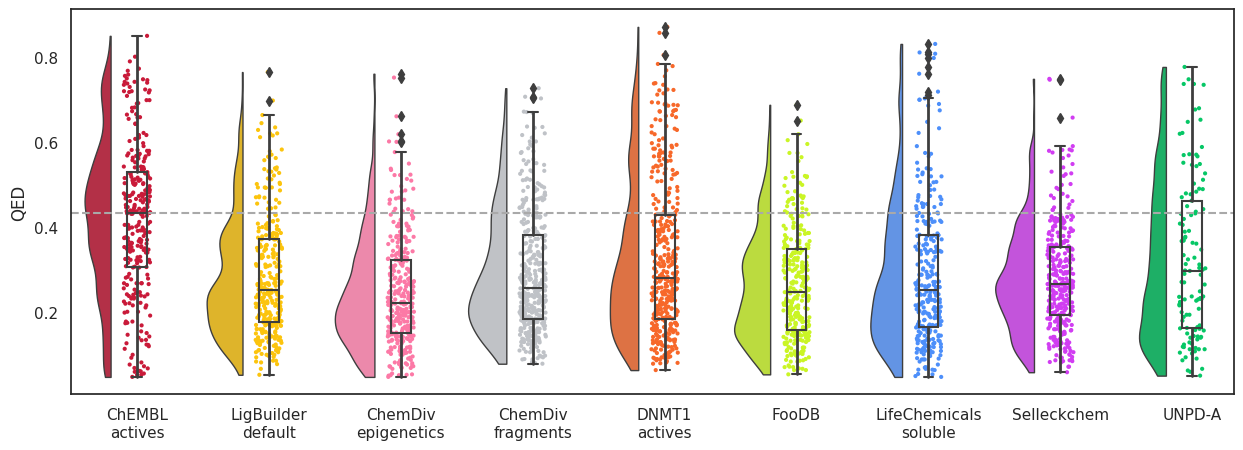

In [66]:
#QED raincloud plot
palette= ['#C91A39', '#FCC40D', '#FC79A6', '#BFC2C7', '#F7682A', '#CAF525', '#4d8ffa', '#D13DF2', '#06C766']

dx = "DATABASE"; dy = "QED"; ort = "v"; pal = palette; sigma = .2
f, ax = plt.subplots(figsize=(15, 5))

ax=pt.RainCloud(x = dx, y = dy, data = data, palette = pal,
      bw = sigma,width_viol = .6, ax = ax, orient = ort)

ax.set(ylabel='QED')
ax.set(xlabel='')

ax.set_xticklabels(['ChEMBL\nactives', 'LigBuilder\ndefault', 'ChemDiv\nepigenetics', 'ChemDiv\nfragments', 'DNMT1\nactives',
                    'FooDB', 'LifeChemicals\nsoluble', 'Selleckchem', 'UNPD-A'])

plt.axhline(y=0.433, color="darkgray", linestyle = "dashed")

#plt.savefig('LigBuilder_DNMT1_QED.png', dpi=300)

In [28]:
#SAscore median
DNMT1['SA'].median()

3.049

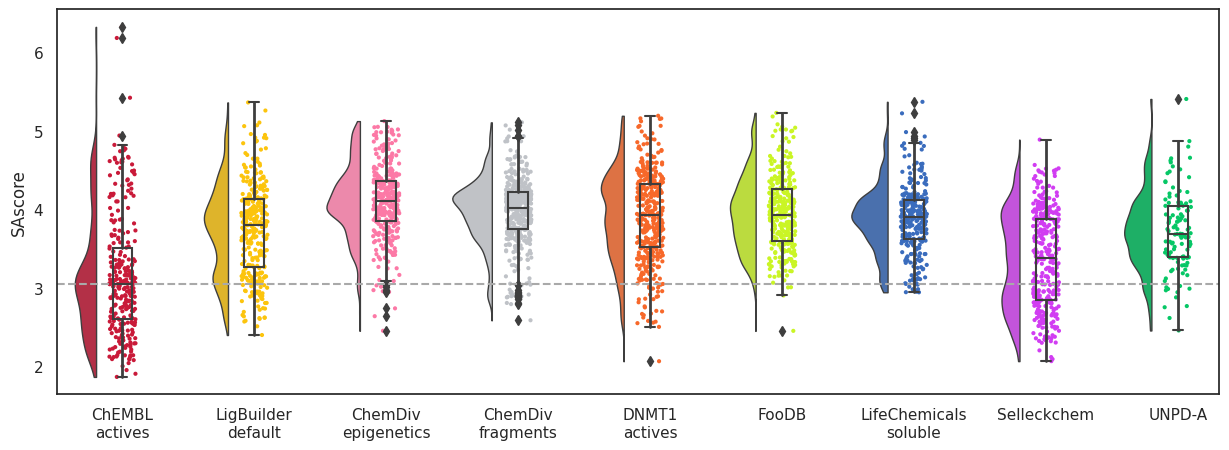

In [67]:
#SAscore raincloud plot
palette= ['#C91A39', '#FCC40D', '#FC79A6', '#BFC2C7', '#F7682A', '#CAF525', '#3A6CBD', '#D13DF2', '#06C766']

dx = "DATABASE"; dy = "SA"; ort = "v"; pal = palette; sigma = .2
f, ax = plt.subplots(figsize=(15, 5))

ax=pt.RainCloud(x = dx, y = dy, data = data, palette = pal,
      bw = sigma,width_viol = .6, ax = ax, orient = ort)

ax.set(ylabel='SAscore')
ax.set(xlabel='')

ax.set_xticklabels(['ChEMBL\nactives', 'LigBuilder\ndefault', 'ChemDiv\nepigenetics', 'ChemDiv\nfragments', 'DNMT1\nactives',
                    'FooDB', 'LifeChemicals\nsoluble', 'Selleckchem', 'UNPD-A'])

plt.axhline(y=3.049, color="darkgray", linestyle = "dashed")

#plt.savefig('LigBuilder_DNMT1_SAscore.png', dpi=300)